In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import pandas as pd

## Explicación
El proposito del método de montecarlo es hallar el área de una figura usando el área de una ya conocida. Para hallar el volumen del lobulo de Roche (y asi conocer su radio), es necesario usar este método. Lo que se hará es colocar N partículas al azar dentro de un cubo (el cubo tendrá como lado 2 veces la distancia de la partícula más masiva a L1), se calculará la constante de jacobi para cada partícula y se va a verificar que la velocidad de la partícula sea mayor a cero (es decir, se encuentre dentro del lóbulo), si v>0, va sumando el número de Nv. Al tener el número total de partículas dentro, se calcula el volumen usando
$$V_l = \frac{N_v}{N}V(d_{L1})$$

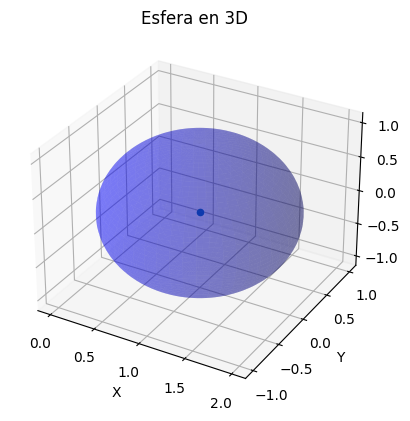

In [4]:
def esf(radio, x0, y0, z0):
    # Crea los datos de la esfera
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = x0 + radio * np.outer(np.cos(u), np.sin(v))
    y = y0 + radio * np.outer(np.sin(u), np.sin(v))
    z = z0 + radio * np.outer(np.ones(np.size(u)), np.cos(v))

    # Configura la figura y los ejes en 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Grafica la esfera
    ax.plot_surface(x, y, z, color='b', shade=True, alpha=0.3)
    ax.scatter3D(x0,y0,z0)

    # Etiqueta de los ejes
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # Título de la figura
    plt.title('Esfera en 3D')
    #plt.axis('equal')

    # Muestra la figura

# Prueba la función
radio_esfera = 1.0
esf(radio_esfera, 1,0,0)

In [5]:
# Definiendo las unidades canonicas 
mt = 5.972e24 #kg
ms = 1.9891e30 # kg
Um = mt + ms
Ul = 1 #UA
alfa = 0.3

In [6]:
def vol(alfa):
  #cj = Cj(alfa)
  
  rm1 = [-alfa, 0, 0]
  rm2 = [1-alfa, 0, 0]
  
  L1 = 1 - alfa - (alfa/3)**(1/3)

  # Contante de Jacobi para el punto de Lagrange
  CJ = 2*(1-alfa)/abs(rm1[0]-L1) + 2*alfa/abs(rm2[0]-L1) + L1**2+ 0**2
  R1 = 2*(1-alfa)/CJ

  # Número de puntos e iniciar la cantidad de puntos dentro del volumen
  N = 10000
  Nv = 0

  x1 = []
  y1 = []
  z1 = []

  for i in range(N):
    x = np.random.uniform(-2*alfa-L1, L1)
    y = np.random.uniform(-alfa-L1, alfa+L1)
    z = np.random.uniform(-alfa-L1, alfa+L1)
    r = (x+alfa)**2+y**2+z**2

    r1 = np.sqrt((x+alfa)**2 + y**2 + z**2)
    r2 = np.sqrt((x-(1-alfa))**2 + y**2 + z**2)
    v2 = 2*(1-alfa)/r1 + 2*alfa/r2 + x**2 + y**2 - CJ
    if v2 >= 0: 
      x1.append(x)
      y1.append(y)
      z1.append(z)
      Nv +=1

  """
  for i in range(N):
    x = np.random.uniform(L1, rm2[0]+(rm2[0]-L1))
    y = np.random.uniform(-(rm2[0]-L1), rm2[0]-L1)
    z = np.random.uniform(-(rm2[0]-L1), rm2[0]-L1)
    r = (x-(1-alfa))**2+y**2+z**2

    r1 = np.sqrt((x+alfa)**2 + y**2 + z**2)
    r2 = np.sqrt((x-(1-alfa))**2 + y**2 + z**2)
    v2 = 2*(1-alfa)/r1 + 2*alfa/r2 + x**2 + y**2 - CJ

    if v2 >= 0:  
      x1.append(x)
      y1.append(y)
      z1.append(z)
  """

  x1.append(rm1[0])
  x1.append(rm2[0])
  y1.append(rm1[1])
  y1.append(rm2[1])
  z1.append(rm1[2])
  z1.append(rm2[2])
  x1.append(L1)
  y1.append(0)
  z1.append(0)

  Volumen = (Nv/N)*(L1+alfa)**3

  return Volumen, x1, y1, z1

In [7]:
def R_roche(vol):
  r = (3*vol/(4*np.pi))**(1/3)
  return r

In [8]:
def R_roche_em(alfa):
  q = alfa/(1-alfa)
  Rl = (0.49*(q)**(2/3))/(0.6*(q)**(2/3)+np.log(1+(q)**(1/3)))
  return Rl

In [10]:
  alfa = 0.2

  volumen, x1, y1, z1 = vol(alfa)
  df = pd.DataFrame()
  df['x'] = x1
  df['y'] = y1
  df['z'] = z1

  fig = px.scatter_3d(df, x='x',y='y',z='z', color='z', range_x = [-3,3], range_y=[-2,2], range_z = [-2,2], opacity=0.3)
  fig.show()
  
  #fig = plt.figure()
  #ax = fig.add_subplot(111,projection='3d')
  #ax.scatter(x1, y1, z1, '.')
  #ax.scatter(rm1[0], rm1[1], rm1[2], 'ro')
  #ax.scatter(rm2[0], rm2[1], rm2[2], 'go')
  #plt.axis("equal")
  #plt.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
def grafica(alfa):

  volumen, x1, y1, z1 = vol(np.array(alfa))
  
  df = pd.DataFrame()
  df['x'] = x1
  df['y'] = y1
  df['z'] = z1

  fig = plt.figure()
  ax = fig.add_subplot(111,projection='3d')
  ax.scatter(x1, y1, z1, '.')
  #ax.scatter(rm1[0], rm1[1], rm1[2], 'ro')
  #ax.scatter(rm2[0], rm2[1], rm2[2], 'go')
  plt.axis("equal")
  plt.show()

  return

def dr(alfa):

  volumen, x1, y1, z1 = vol(np.array(alfa))
  
  #diferencia de los 2 métodos
  R_r = R_roche(volumen)
  R_r_e = R_roche_em(alfa)

  return R_r - R_r_e

In [ ]:
def lobulo():
  plt.close("all")
  from ipywidgets import interact,fixed,widgets
  opciones = dict(continuous_update=True,readout_format=".3f")
  interact(grafica,
          alfa=widgets.FloatSlider(min=0.01,max=0.5,step=0.01,**opciones));

In [ ]:
lobulo()

interactive(children=(FloatSlider(value=0.01, description='alfa', max=0.5, min=0.01, readout_format='.3f', ste…

In [ ]:
alfa = np.linspace(0.01, 0.5, 20)
drr = []
for i in range(len(alfa)):
  k = dr(alfa[i])
  drr.append(k)

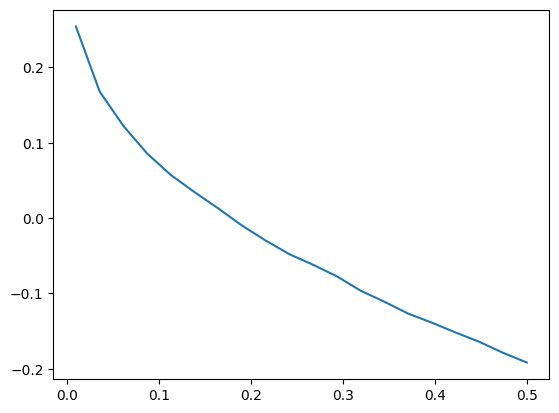

In [ ]:
xx = np.linspace(0,1, len(drr))
plt.plot(alfa, drr)